In [1]:
## System
import sys
import os
from collections import defaultdict

## Pandas
import pandas as pd
import numpy as np

## Plotting 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import shapely.geometry as sg
import seaborn as sns


In /Users/michaelcormier/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/michaelcormier/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/michaelcormier/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
patho_vars = pd.read_csv("../data/scored_patho_vars.from.lit.txt", sep = "\t")

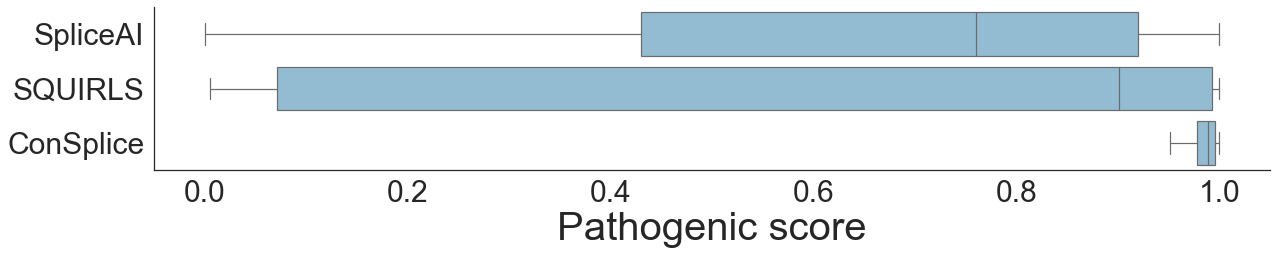

In [11]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

fig, ax = plt.subplots(figsize = (20,3))
sns.set(font='Arial', style = "white")
sns.set_context("paper", font_scale = 2)
sns.despine()

sns.boxplot(data = patho_vars[["MAX_SpliceAI","MAX_SQUIRLS","50bp_ConSplice"]], 
            orient = "h", 
            color = sns.color_palette("Blues")[2],
            fliersize = 0)

ax.set_yticklabels(["SpliceAI","SQUIRLS","ConSplice"], fontsize = 40)
ax.set_xlabel("Pathogenic score", fontsize = 40)

ax.tick_params(axis="x", labelsize=30)
ax.tick_params(axis="y", labelsize=30) 


plt.savefig('../figures/figure4_D.1of2.svg')

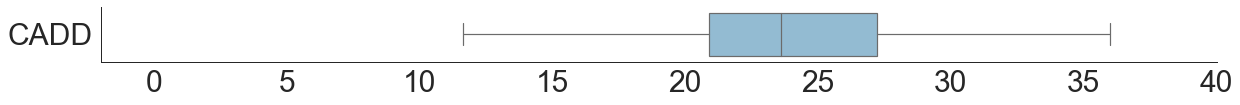

In [4]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

fig, ax = plt.subplots(figsize = (20,1))
sns.set(font='Arial', style = "white")
sns.set_context("paper", font_scale = 2)
sns.despine()

sns.boxplot(data = patho_vars[["CADD_PHRED_Score"]], 
            orient = "h",
            color = sns.color_palette("Blues")[2],
            fliersize = 0)

ax.set_yticklabels(["CADD"], fontsize = 40)

ax.tick_params(axis="x", labelsize=30)
ax.tick_params(axis="y", labelsize=30)

#plt.hlines(23,-0.5,0.5, color = "black", lw = 3)

ax.set_xlim(-2,40)

plt.savefig('../figures/figure4_D.2of2.svg')

In [5]:
patho_vars["relative_pos"] = patho_vars["Bases_From_Exon-Intron_Junction"].apply(lambda x: x.strip().split(" ")[0])

In [6]:
relative_pos_mapping = {
                       "A->10": -27,
                       "A-10": -25, 
                       "A-9":-24,
                       "A-8":-23,
                       "A-7":-22,
                       "A-6":-21,
                       "A-5":-20,
                       "A-4":-19,
                       "A-3":-18,
                       "A-2":-17,
                       "A-1":-16,
                       "A+1":-14,
                       "A+2":-13,
                       "A+3":-12,
                       "A+4":-11,
                       "A+5":-10,
                       "A+6":-9,
                       "A+7":-8,
                       "A+8":-7,
                       "A+9":-6,
                       "A+10":-5,
                       "A+>10":-3, 
                       "D->10":3,
                       "D-10":5, 
                       "D-9":6,
                       "D-8":7,
                       "D-7":8,
                       "D-6":9,
                       "D-5":10,
                       "D-4":11,
                       "D-3":12,
                       "D-2":13,
                       "D-1":14,
                       "D+1":16,
                       "D+2":17,
                       "D+3":18,
                       "D+4":19,
                       "D+5":20,
                       "D+6":21,
                       "D+7":22,
                       "D+8":23,
                       "D+9":24,
                       "D+10":25,
                       "D+>10":27,
                       }

In [7]:
switched_relative_pos_mapping = {y:x for x,y in relative_pos_mapping.items()}
switched_relative_pos_mapping.update({28:"",
                                      26:"",
                                      15:"",
                                      4:"",
                                      2:"",
                                      1:"",
                                      0:"",
                                      -1:"",
                                      -2:"",
                                      -4:"",
                                      -15:"",
                                      -26:"",
                                      -28:""})

In [8]:
plot_pos = []

for v in patho_vars.itertuples():
    relative_pos = v.relative_pos
    site, pos, sign = relative_pos.strip().split("-") + ["-"] if "-" in relative_pos else relative_pos.strip().split("+") + ["+"]
    
    
    key = "{}{}{}".format(site,sign,">10" if int(pos) > 10 else pos)
    plot_pos.append(relative_pos_mapping[key])

In [9]:
patho_vars["plot_pos"] = plot_pos

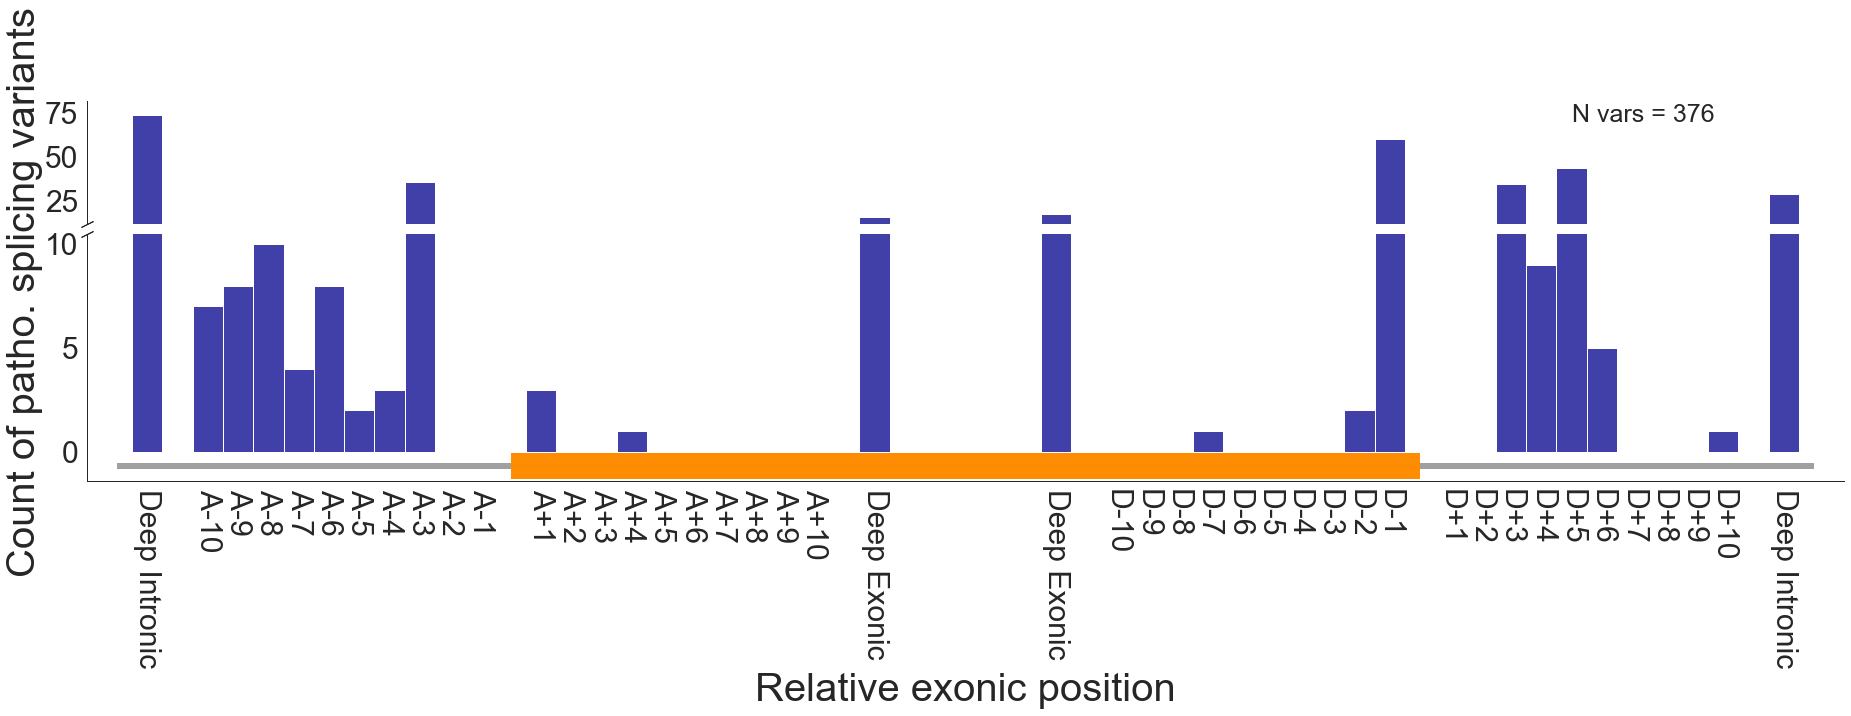

In [10]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 2]}, sharex=True, figsize = (31.5,7))
fig.subplots_adjust(hspace=0.05)  # adjust space between axes
sns.set(style="white")
sns.despine()


xs, ys = sg.Polygon([(-28,-0.8),(-28,-0.55),(28,-0.55),(28,-0.8)]).exterior.xy
ax2.fill(xs,ys, fc="grey",alpha = 0.75, ec="none")

xs, ys = sg.Polygon([(-15,-0.05),(-15,-1.3),(15,-1.3),(15,-0.05)]).exterior.xy
ax2.fill(xs,ys, fc="darkorange", alpha = 0.99, ec="none")   
    
deep_intronic = set(["A->10","D+>10"])
deep_exonic = set(["A+>10","D->10"])
xticks = ["Deep Intronic" if switched_relative_pos_mapping[i] in deep_intronic 
          else  "Deep Exonic" if switched_relative_pos_mapping[i] in deep_exonic 
          else switched_relative_pos_mapping[i] for i in range(-28,29) ]    


sns.histplot(x = "plot_pos", data = patho_vars.sort_values(by = ["relative_pos"]), ax = ax2, discrete = True, color = "darkblue"  ) 
#plt.xlim(-28,28)
ax2.set_ylim(-1.4,10.5)
ax2.set_xlim(-29,29)
plt.xticks(range(-28,29),xticks, rotation = -90, fontsize = 20)


sns.histplot(x = "plot_pos", data = patho_vars.sort_values(by = ["relative_pos"]), ax = ax1, discrete = True, color = "darkblue" ) 
ax1.set_ylim(12,82)
ax1.set_xlim(-29,29)

ax1.set_ylabel("")
ax1.set_xlabel("")

ax2.set_ylabel("")

fig.text(0.09, 0.5, 'Count of patho. splicing variants', va='center', rotation='vertical', fontsize = 40)
ax2.set_xlabel("Relative exonic position", fontsize = 40)

ax1.text(20, 70, "N vars = {}".format(patho_vars.shape[0]), fontsize = 25)

#ax2.text(-14.9, -0.55, "Acceptor".format(patho_vars.shape[0]), fontsize = 20, color = "white", fontweight='bold')
#ax2.text(-14, -1.1, "Side".format(patho_vars.shape[0]), fontsize = 20, color = "white", fontweight='bold')

#ax2.text(11.5, -0.55, "Donor".format(patho_vars.shape[0]), fontsize = 20, color = "white", fontweight='bold')
#ax2.text(12.4, -1.1, "Side".format(patho_vars.shape[0]), fontsize = 20, color = "white", fontweight='bold')


ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.tick_params(labeltop=False)

ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 0], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.tick_params(axis="x", labelsize=20)
ax1.tick_params(axis="y", labelsize=30)   
ax2.tick_params(axis="x", labelsize=30)
ax2.tick_params(axis="y", labelsize=30)

ax2.xaxis.set_ticks_position('none') 

plt.savefig('../figures/figure4_C.svg')